In [42]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler

from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

from scipy.special import expit

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import loguniform, uniform
from scikitplot.metrics import plot_roc
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [43]:
df_train=pd.read_csv("../ravdess_features_train_pulito.csv")
df_test=pd.read_csv("../ravdess_features_test_pulito.csv")

df_train["emotion"]=df_train["emotion"].replace(["fearful", "angry", "happy", "surprised", "neutral", "calm", "sad", "disgust"],[0,1,2,3,4,5,6,7])
df_train["emotional_intensity"]=df_train["emotional_intensity"].replace(["normal", "strong"],[0,1])
df_train["sex"]=df_train["sex"].replace(["M", "F"],[0,1])
df_train["statement"]=df_train["statement"].replace(["Dogs are sitting by the door", "Kids are talking by the door"],[0,1])
df_train["vocal_channel"]=df_train["vocal_channel"].replace(["speech", "song"],[0,1])

df_test["emotion"]=df_test["emotion"].replace(["fearful", "angry", "happy", "surprised", "neutral", "calm", "sad", "disgust"],[0,1,2,3,4,5,6,7])
df_test["emotional_intensity"]=df_test["emotional_intensity"].replace(["normal", "strong"],[0,1])
df_test["sex"]=df_test["sex"].replace(["M", "F"],[0,1])
df_test["statement"]=df_test["statement"].replace(["Dogs are sitting by the door", "Kids are talking by the door"],[0,1])
df_test["vocal_channel"]=df_test["vocal_channel"].replace(["speech", "song"],[0,1])

### Outlier dropping

In [44]:
#df_train.drop(axis="index", labels=[35,243,451,554,563,658,659,1031,1075,1283], inplace=True)
X_train=df_train.drop(columns=["emotion"]).values
y_train=df_train.emotion.values

#df_test.drop(axis="index", labels=[33,34,138,196,197,198,199], inplace=True)
X_test=df_test.drop(columns=["emotion"]).values
y_test=df_test.emotion.values

### Feature selection (da implementare)

In [40]:
sel = SelectKBest(k=108)
X_train_sel = sel.fit_transform(X_train, y_train)
X_test_sel = sel.transform(X_test)

### Scaling

In [45]:
scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

In [46]:
X_train.shape

(1828, 376)

In [47]:
X_test.shape

(624, 376)

In [35]:
a = X_test

In [21]:
clf = LinearSVC(C=1.0, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.46153846153846156
F1-score [0.44       0.56034483 0.37       0.52252252 0.46153846 0.52631579
 0.31168831 0.47368421]
              precision    recall  f1-score   support

           0       0.61      0.34      0.44        96
           1       0.48      0.68      0.56        96
           2       0.36      0.39      0.37        96
           3       0.46      0.60      0.52        48
           4       0.60      0.38      0.46        48
           5       0.49      0.57      0.53        96
           6       0.41      0.25      0.31        96
           7       0.41      0.56      0.47        48

    accuracy                           0.46       624
   macro avg       0.48      0.47      0.46       624
weighted avg       0.47      0.46      0.45       624



/Users/jacopogneri/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# LinearSVC

### Tuning hyperparameter

In [ ]:
def get_models_unweighted():
    models = dict()
    for p in [1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 0.1, 0.5, 1]:
        models[p] = LinearSVC(multi_class='ovr', C=p, class_weight=None)
    return models

def get_models_weighted():
    models = dict()
    for p in [1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 0.1, 0.5, 1]:
        models[p] = LinearSVC(multi_class='ovr', C=p, class_weight="balanced")
    return models

def evaluate_model_accuracy(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

def evaluate_model_f1(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='f1_weighted', cv=cv, n_jobs=-1)
    return scores

In [ ]:
models = get_models_unweighted()
accuracy, f1, names = list(), list(), list()
for name, model in models.items():
	accuracy_scores = evaluate_model_accuracy(model, X_train, y_train)
	f1_scores = evaluate_model_f1(model, X_train, y_train)
	accuracy.append(accuracy_scores)
	f1.append(f1_scores)
	names.append(name)
	print(name)
	print('Accuracy:\t %.3f (%.3f)' % (np.mean(accuracy_scores), np.std(accuracy_scores)))
	print('f1:\t %.3f (%.3f)' % (np.mean(f1_scores), np.std(f1_scores)))
# Tempo stimato 4.30m

1e-05
Accuracy:	 0.390 (0.031)
f1:	 0.331 (0.035)
5e-05
Accuracy:	 0.460 (0.037)
f1:	 0.427 (0.039)
0.0001
Accuracy:	 0.496 (0.034)
f1:	 0.473 (0.035)
0.0005
Accuracy:	 0.554 (0.035)
f1:	 0.539 (0.036)
0.001
Accuracy:	 0.574 (0.034)
f1:	 0.560 (0.035)
0.005
Accuracy:	 0.608 (0.037)
f1:	 0.600 (0.038)
0.01
Accuracy:	 0.613 (0.038)
f1:	 0.607 (0.040)
0.05
Accuracy:	 0.615 (0.035)
f1:	 0.612 (0.036)
0.1
Accuracy:	 0.614 (0.033)
f1:	 0.612 (0.033)
0.5
Accuracy:	 0.594 (0.033)
f1:	 0.591 (0.032)
1
Accuracy:	 0.586 (0.032)
f1:	 0.585 (0.031)


In [ ]:
'''
models = get_models_weighted()
accuracy, f1, names = list(), list(), list()
for name, model in models.items():
	accuracy_scores = evaluate_model_accuracy(model, X_train, y_train)
	f1_scores = evaluate_model_f1(model, X_train, y_train)
	accuracy.append(accuracy_scores)
	f1.append(f1_scores)
	names.append(name)
	print(name)
	print('Accuracy:\t %.3f (%.3f)' % (np.mean(accuracy_scores), np.std(accuracy_scores)))
	print('f1:\t %.3f (%.3f)' % (np.mean(f1_scores), np.std(f1_scores)))
	print("\n")
'''
# Tempo stimato 4.30m

'\nmodels = get_models_weighted()\naccuracy, f1, names = list(), list(), list()\nfor name, model in models.items():\n\taccuracy_scores = evaluate_model_accuracy(model, X_train, y_train)\n\tf1_scores = evaluate_model_f1(model, X_train, y_train)\n\taccuracy.append(accuracy_scores)\n\tf1.append(f1_scores)\n\tnames.append(name)\n\tprint(name)\n\tprint(\'Accuracy:\t %.3f (%.3f)\' % (np.mean(accuracy_scores), np.std(accuracy_scores)))\n\tprint(\'f1:\t %.3f (%.3f)\' % (np.mean(f1_scores), np.std(f1_scores)))\n\tprint("\n")\n'

Migliore risultato C=0.05, class_weight="balanced"

In [48]:
clf = LinearSVC(C=0.05, class_weight="balanced", max_iter=10000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.4823717948717949
F1-score [0.46540881 0.66363636 0.36956522 0.47272727 0.4        0.5645933
 0.24242424 0.54263566]
              precision    recall  f1-score   support

           0       0.59      0.39      0.47        96
           1       0.59      0.76      0.66        96
           2       0.39      0.35      0.37        96
           3       0.42      0.54      0.47        48
           4       0.37      0.44      0.40        48
           5       0.52      0.61      0.56        96
           6       0.44      0.17      0.24        96
           7       0.43      0.73      0.54        48

    accuracy                           0.48       624
   macro avg       0.47      0.50      0.47       624
weighted avg       0.48      0.48      0.46       624



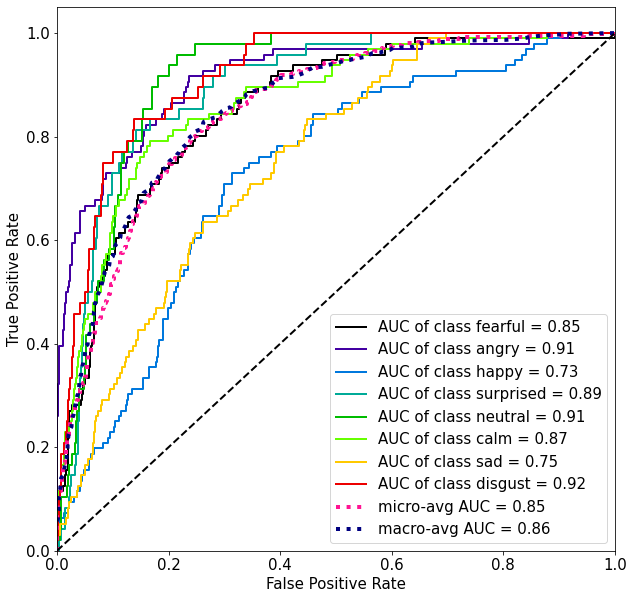

In [49]:
y_score = clf.decision_function(X_test)

plot_roc(y_test, y_score, figsize=(10,10), title_fontsize=15, text_fontsize=15)

plt.legend(["AUC of class fearful = 0.85", "AUC of class angry = 0.91", "AUC of class happy = 0.73", "AUC of class surprised = 0.89", "AUC of class neutral = 0.91", "AUC of class calm = 0.87", "AUC of class sad = 0.75", "AUC of class disgust = 0.92", "micro-avg AUC = 0.85", "macro-avg AUC = 0.86"], fontsize=15)

plt.title("")

plt.show()

## Nonlinear SVM

In [ ]:
'''
param_grid = {
    "C": [1e-2, 2e-2, 3e-2, 4e-2, 5e-2, 6e-2, 7e-2, 8e-2, 9e-2, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "coef0": [1e-2, 2e-2, 3e-2, 4e-2, 5e-2, 6e-2, 7e-2, 8e-2, 9e-2, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1],
    "gamma": ["scale", "auto"]
}
grid = RandomizedSearchCV(
    SVC(class_weight="balanced", max_iter=-1),
    param_distributions=param_grid,
    scoring="accuracy",
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    n_iter=500,
)
grid.fit(X_train, y_train)
clf = grid.best_estimator_
'''
# tempo impiegato circa 34 minuti

In [ ]:
grid.best_estimator_

SVC(C=0.75, class_weight='balanced', coef0=1, kernel='poly')

In [ ]:
clf = SVC(C=0.75, class_weight='balanced', coef0=1, gamma='auto', kernel='poly', degree=2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5283630470016207
F1-score [0.41610738 0.68656716 0.47236181 0.47706422 0.60294118 0.58241758
 0.35460993 0.58119658]
              precision    recall  f1-score   support

           0       0.58      0.32      0.42        96
           1       0.62      0.78      0.69        89
           2       0.46      0.49      0.47        96
           3       0.43      0.54      0.48        48
           4       0.47      0.85      0.60        48
           5       0.62      0.55      0.58        96
           6       0.56      0.26      0.35        96
           7       0.49      0.71      0.58        48

    accuracy                           0.53       617
   macro avg       0.53      0.56      0.52       617
weighted avg       0.54      0.53      0.51       617



Best params: C=0.75, class_weight='balanced', coef0=1, gamma='auto', kernel='poly'.

Non convince il coef0. Faccio GridSearchCV su quest'ultimo.

In [ ]:
clf = SVC(C=0.75, class_weight='balanced', coef0=1, gamma='auto', kernel='poly', degree=2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5283630470016207
F1-score [0.41610738 0.68656716 0.47236181 0.47706422 0.60294118 0.58241758
 0.35460993 0.58119658]
              precision    recall  f1-score   support

           0       0.58      0.32      0.42        96
           1       0.62      0.78      0.69        89
           2       0.46      0.49      0.47        96
           3       0.43      0.54      0.48        48
           4       0.47      0.85      0.60        48
           5       0.62      0.55      0.58        96
           6       0.56      0.26      0.35        96
           7       0.49      0.71      0.58        48

    accuracy                           0.53       617
   macro avg       0.53      0.56      0.52       617
weighted avg       0.54      0.53      0.51       617



In [ ]:
clf = SVC(C=0.75, class_weight='balanced', coef0=1, gamma='auto', kernel='poly', degree=3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5056726094003241
F1-score [0.43312102 0.63809524 0.43925234 0.48       0.53225806 0.5698324
 0.37837838 0.54901961]
              precision    recall  f1-score   support

           0       0.56      0.35      0.43        96
           1       0.55      0.75      0.64        89
           2       0.40      0.49      0.44        96
           3       0.46      0.50      0.48        48
           4       0.43      0.69      0.53        48
           5       0.61      0.53      0.57        96
           6       0.54      0.29      0.38        96
           7       0.52      0.58      0.55        48

    accuracy                           0.51       617
   macro avg       0.51      0.52      0.50       617
weighted avg       0.52      0.51      0.50       617



### GridSearchCV su coef0 e C

In [95]:
'''
param_grid = {
    "coef0": np.linspace(0,2,num=50),
    "C": np.linspace(1e-16,1,num=25),
}
grid = GridSearchCV(
    SVC(gamma="auto", kernel="poly", class_weight="balanced", max_iter=-1),
    param_grid=param_grid,
    scoring="accuracy",
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
)
grid.fit(X_train, y_train)
clf = grid.best_estimator_
'''
# tempo stimato circa 220 minuti

In [96]:
grid.best_params_

{'C': 1.0, 'coef0': 1.9591836734693877}

coef0=2 risulta il migliore

In [98]:
clf = SVC(C=1, class_weight='balanced', coef0=2, gamma='auto', kernel='poly', degree=2, max_iter=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5072933549432739
F1-score [0.44871795 0.60273973 0.44680851 0.5        0.57142857 0.58695652
 0.36619718 0.48076923]
              precision    recall  f1-score   support

           0       0.58      0.36      0.45        96
           1       0.51      0.74      0.60        89
           2       0.46      0.44      0.45        96
           3       0.45      0.56      0.50        48
           4       0.45      0.79      0.57        48
           5       0.61      0.56      0.59        96
           6       0.57      0.27      0.37        96
           7       0.45      0.52      0.48        48

    accuracy                           0.51       617
   macro avg       0.51      0.53      0.50       617
weighted avg       0.52      0.51      0.50       617



In [99]:
clf = SVC(C=0.5, class_weight='balanced', coef0=2, gamma='auto', kernel='poly', degree=2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.520259319286872
F1-score [0.42384106 0.66666667 0.46560847 0.48214286 0.60294118 0.56830601
 0.32857143 0.56896552]
              precision    recall  f1-score   support

           0       0.58      0.33      0.42        96
           1       0.58      0.78      0.67        89
           2       0.47      0.46      0.47        96
           3       0.42      0.56      0.48        48
           4       0.47      0.85      0.60        48
           5       0.60      0.54      0.57        96
           6       0.52      0.24      0.33        96
           7       0.49      0.69      0.57        48

    accuracy                           0.52       617
   macro avg       0.52      0.56      0.51       617
weighted avg       0.53      0.52      0.50       617

